In [1]:
import sys
import os
sys.path.append("../..")
from diachr import DiachromaticInteractionSet
from diachr import IaFreqDistAnalysis

# Create directory for output files generated in this notebook 
NOTEBOOK_RESULTS_DIR = 'results/distance_dependent_contact_frequencies'
%mkdir -p $NOTEBOOK_RESULTS_DIR

# Distance-dependent contact frequencies

In this notebook, the distributions of read pair counts per interaction and interaction distances are compared.

## Load interactions for analysis

First, we read an interaction file into a `DiachromaticInteractionSet`. Then we pass the `DiachromaticInteractionSet` to an object of class `IaFreqDistAnalysis` in which the interactions are grouped by chromosome, interaction category and enrichment status.

In [2]:
AUTHOR_SHORT = 'JAV' # JAV, MIF, SCH or MON
PROTOCOL = 'CHC' # HC or CHC
CELL_TYPE_SHORT = 'MAC_M0' # GM12878, MK, ERY, NEU, MON, MAC_M0, ..., MESC, MFLC, MESC_R1B, CM, IPSC
OUT_PREFIX = AUTHOR_SHORT + '_' + CELL_TYPE_SHORT + '_' + PROTOCOL +'_REPC'
INTERACTION_FILE = '../../UICer_interactions/' + PROTOCOL + '/' + OUT_PREFIX + '_evaluated_and_categorized_interactions.tsv.gz'

In [3]:
# Create DiachromaticInteractionSet
d11_interaction_set = DiachromaticInteractionSet()
d11_interaction_set.parse_file(
    i_file = INTERACTION_FILE,
    verbose = True)

# Pass the DiachromaticInteractionSet to IaFreqDistAnalysis
ia_freq_dist_analysis = IaFreqDistAnalysis()
report_dict = ia_freq_dist_analysis.ingest_interaction_set(
    d11_inter_set = d11_interaction_set,
    verbose = True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../../UICer_interactions/CHC/JAV_MAC_M0_CHC_REPC_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Parsed 2,000,000 interaction lines ...
	[INFO] Parsed 3,000,000 interaction lines ...
	[INFO] Parsed 4,000,000 interaction lines ...
	[INFO] Parsed 5,000,000 interaction lines ...
	[INFO] Parsed 6,000,000 interaction lines ...
	[INFO] Set size: 6,954,711
[INFO] ... done.
[INFO] Reading interactions and group them according to chromosomes, interaction and enrichment category ...
	[INFO] Read 1,000,000 interactions ...
	[INFO] Read 2,000,000 interactions ...
	[INFO] Read 3,000,000 interactions ...
	[INFO] Read 4,000,000 interactions ...
	[INFO] Read 5,000,000 interactions ...
	[INFO] Read 6,000,000 interactions ...
	[INFO] Total number of interactions read: 6,954,711
[INFO] ... done.


## Organization of  interaction data

To get an overview of how the data is structured, the total numbers of interactions in the various categories can be displayed as follows:

In [4]:
print(ia_freq_dist_analysis.get_ingest_interaction_set_info_report())

[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 6,954,711
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DIX: 
			[INFO] NN: 11,255
			[INFO] EE: 38,146
			[INFO] NE: 330,026
			[INFO] EN: 335,426
		[INFO] DI: 
			[INFO] NN: 74,902
			[INFO] EE: 75,034
			[INFO] NE: 1,140,508
			[INFO] EN: 1,143,934
		[INFO] UIR: 
			[INFO] NN: 74,902
			[INFO] EE: 75,034
			[INFO] NE: 1,149,254
			[INFO] EN: 1,135,188
		[INFO] UI: 
			[INFO] NN: 275,550
			[INFO] EE: 74,426
			[INFO] NE: 513,059
			[INFO] EN: 508,067
		[INFO] ALL: 
			[INFO] NN: 436,609
			[INFO] EE: 262,640
			[INFO] NE: 3,132,847
			[INFO] EN: 3,122,615
[INFO] End of report.



The category `DI` contains unbalanced interactions for which balanced reference interaction could be selected. The `UIR` category contains balanced reference interactions that have been selected in such a way that they are comparable to `DI` interactions in terms of interaction numbers and read pair counts per interaction. The category `DIX` contains unbalanced interactions for which no reference interaction could be selected. The category `UI` contains interactions that have not been selected as a reference interaction. In addition, there is a category `ALL` that contains the interactions of all categories.

## Collection of read pair numbers and interaction distances

After the interactions have been read in and grouped, the read pair numbers and interaction distances within the various categories can be determined using the function `get_all_rp_nums_and_i_dists()`. By default, the analysis is carried out on all chromosomes, but it can also be restricted to a subset of chromosomes. The function returns two dictionaries, one for the read pair numbers per interaction and one for the interaction distances. The dictionaries are structured as the interactions are shown above. But instead of just numbers, lists of numbers are stored, i.e. one number for each interaction. In addition, the dictionaries contain information that is required for plotting.

In [5]:
rp_num_dict, i_dist_dict = ia_freq_dist_analysis.get_all_rp_nums_and_i_dists(
    #chromosomes=['chr21'],
    verbose = False
)

## 2x2 plot grids with historgrams comparable in terms of axis limits and bin size

We implemented a plot function that can be used to compare the the distributions of read pair counts per interaction or interaction distances for two interaction categories and two enrichment states.

### Total read pair counts per interaction

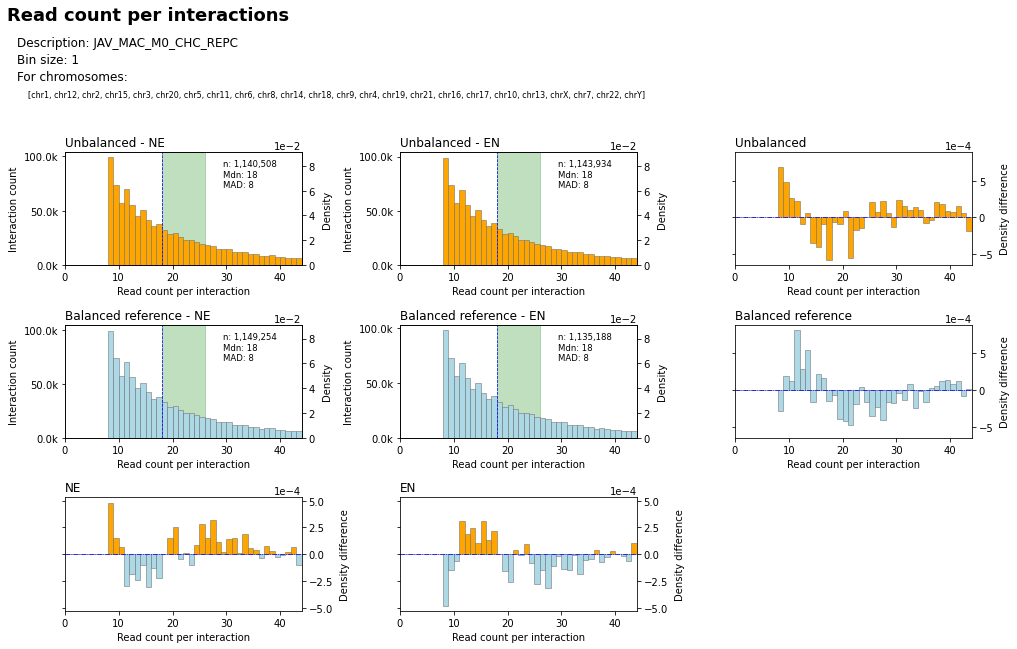

In [6]:
# Create 2x2 histogram grid for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis.create_2x2_hist_grid(
    num_dict = rp_num_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    perform_tests = False,
    description = OUT_PREFIX,
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_2x2_hist_grid_i_rpc_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

#### Explanation of the plot

In the grid, the x-axes of all histograms are comparable, with at least `q_lim=0.85` of the data shown. Each histogram has two y-axes. The left axis shows the absolute frequencies and the right axis shows the relative frequencies or densities. All y-axes are normalized to the maximum density in the four histograms. Each histogram contains three text fields, one for the number of interactions (n), one for the median (Mdn.) and one for the median absolute deviation (MAD). In addition, a blue dashed line is drawn at the median and the width of the  range highlighted in green corresponds to the MAD. The plots of the bottom row and last column show the differences in densities for each bin.

### Interaction distances

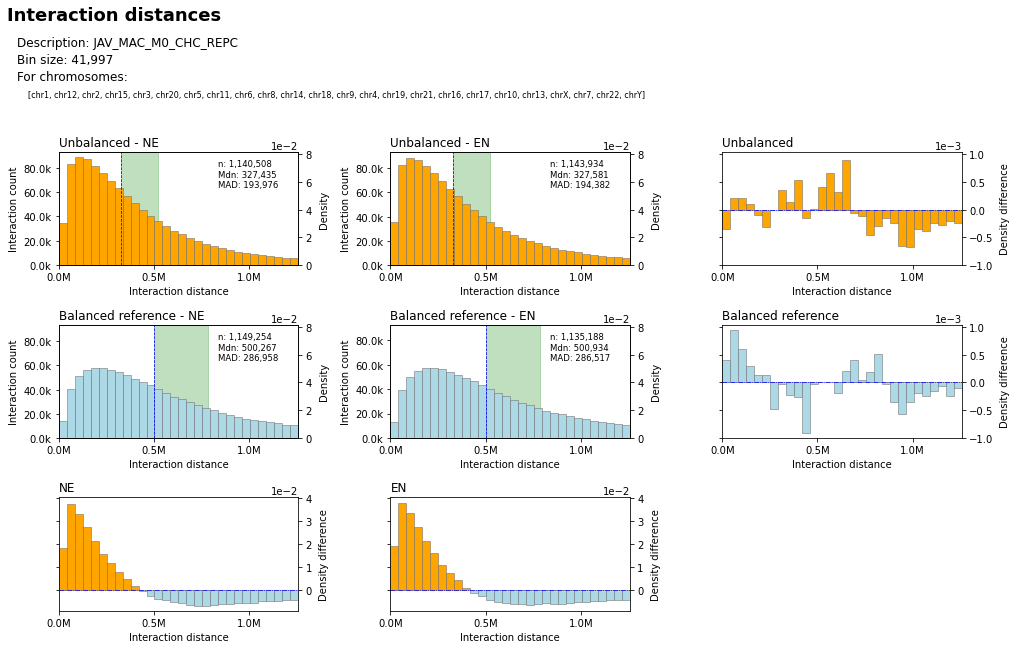

In [7]:
# Create 2x2 histogram grid for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis.create_2x2_hist_grid(
    num_dict = i_dist_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    perform_tests = False,
    description = OUT_PREFIX,
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_2x2_hist_grid_i_dist_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

## Alternative selection of reference interactions

We have implemented a alternative selection of reference interactions, in which we no longer select reference interactions with identical total read pair counts, but rather those with identical maxima of the four counts.

In [8]:
# Select new reference interactions
d11_interaction_set.deselect_reference_interactions()
d11_interaction_set.select_reference_interactions(selection_rule='RPMAX')

# Pass the DiachromaticInteractionSet to IaFreqDistAnalysis
ia_freq_dist_analysis_rpmaxn = IaFreqDistAnalysis()
report_dict = ia_freq_dist_analysis_rpmaxn.ingest_interaction_set(
    d11_inter_set = d11_interaction_set,
    verbose = False)

print(ia_freq_dist_analysis_rpmaxn.get_ingest_interaction_set_info_report())

[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 6,954,711
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DIX: 
			[INFO] NN: 27,688
			[INFO] EE: 52,286
			[INFO] NE: 591,434
			[INFO] EN: 598,077
		[INFO] DI: 
			[INFO] NN: 58,469
			[INFO] EE: 60,894
			[INFO] NE: 879,100
			[INFO] EN: 881,283
		[INFO] UIR: 
			[INFO] NN: 58,469
			[INFO] EE: 60,894
			[INFO] NE: 884,724
			[INFO] EN: 875,659
		[INFO] UI: 
			[INFO] NN: 291,983
			[INFO] EE: 88,566
			[INFO] NE: 777,589
			[INFO] EN: 767,596
		[INFO] ALL: 
			[INFO] NN: 436,609
			[INFO] EE: 262,640
			[INFO] NE: 3,132,847
			[INFO] EN: 3,122,615
[INFO] End of report.



In [9]:
# Collect read pair and interaction numbers
rpmaxn_rp_num_dict, rpmaxn_i_dist_dict = ia_freq_dist_analysis_rpmaxn.get_all_rp_nums_and_i_dists(
    #chromosomes=['chr21'],
    verbose = False
)

### Total read pair counts per interaction

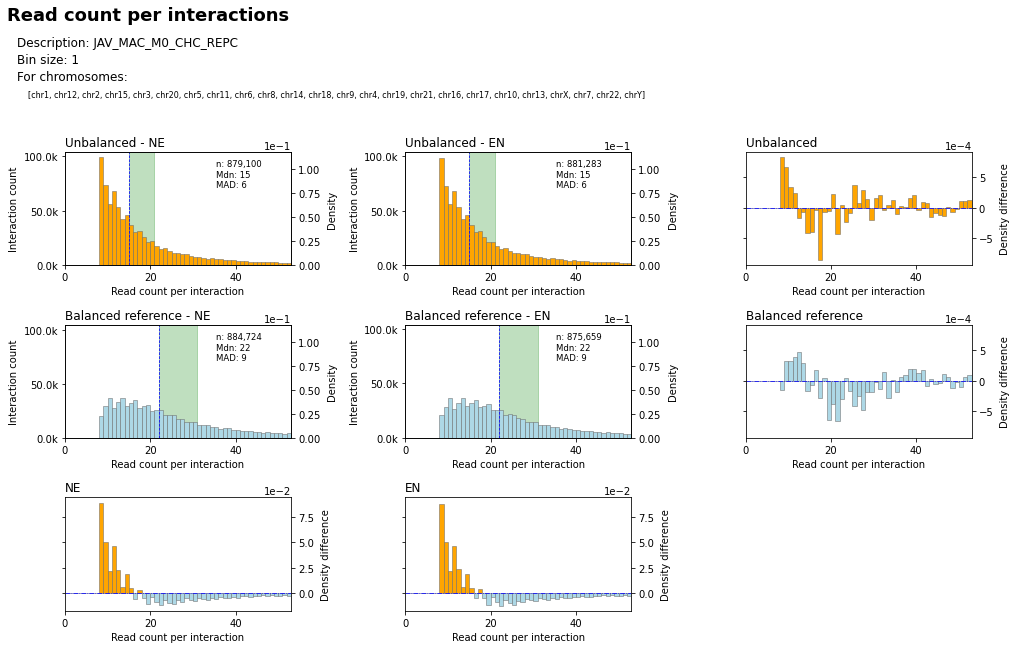

In [10]:
# Create 2x2 histogram grid for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis_rpmaxn.create_2x2_hist_grid(
    num_dict = rpmaxn_rp_num_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    perform_tests = False,
    description = OUT_PREFIX,
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_2x2_hist_grid_i_rpc_rpmaxn_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

### Interaction distances

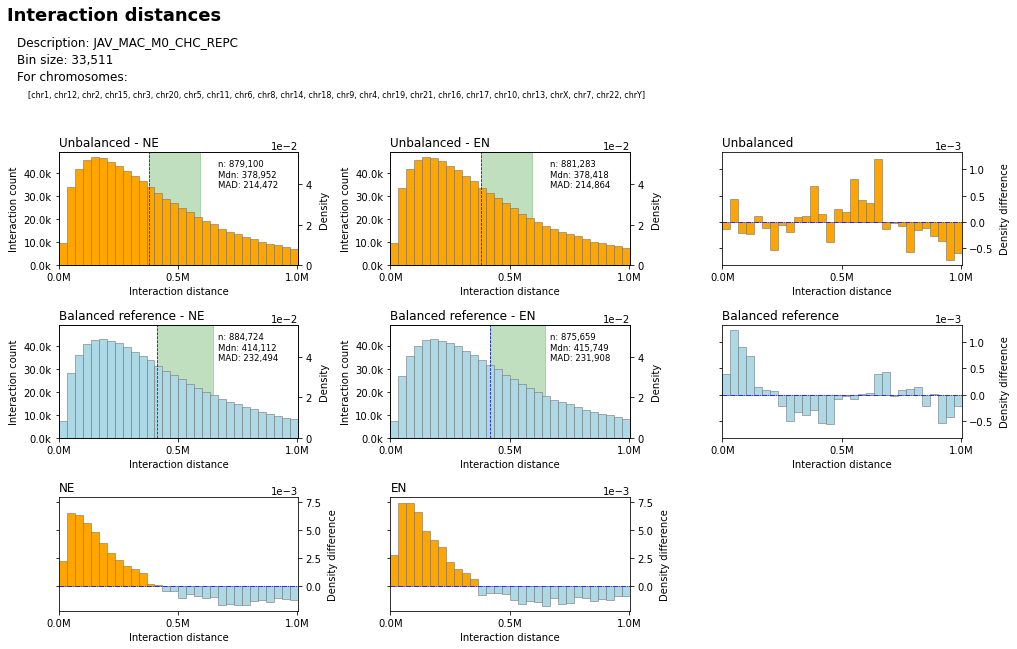

In [11]:
# Create 2x2 histogram grid for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis_rpmaxn.create_2x2_hist_grid(
    num_dict = rpmaxn_i_dist_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    perform_tests = False,
    description = OUT_PREFIX,
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_2x2_hist_grid_i_dist_rpmaxn_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

## Alternative selection of reference interactions 2

In [13]:
# Select new reference interactions
d11_interaction_set.deselect_reference_interactions()
d11_interaction_set.select_reference_interactions(selection_rule='RPMAX2')

# Pass the DiachromaticInteractionSet to IaFreqDistAnalysis
ia_freq_dist_analysis_rpmaxn = IaFreqDistAnalysis()
report_dict = ia_freq_dist_analysis_rpmaxn.ingest_interaction_set(
    d11_inter_set = d11_interaction_set,
    verbose = False)

print(ia_freq_dist_analysis_rpmaxn.get_ingest_interaction_set_info_report())

[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 6,954,711
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DIX: 
			[INFO] NN: 22,061
			[INFO] EE: 47,180
			[INFO] NE: 518,127
			[INFO] EN: 524,100
		[INFO] DI: 
			[INFO] NN: 64,096
			[INFO] EE: 66,000
			[INFO] NE: 952,407
			[INFO] EN: 955,260
		[INFO] UIR: 
			[INFO] NN: 64,096
			[INFO] EE: 66,000
			[INFO] NE: 959,020
			[INFO] EN: 948,647
		[INFO] UI: 
			[INFO] NN: 286,356
			[INFO] EE: 83,460
			[INFO] NE: 703,293
			[INFO] EN: 694,608
		[INFO] ALL: 
			[INFO] NN: 436,609
			[INFO] EE: 262,640
			[INFO] NE: 3,132,847
			[INFO] EN: 3,122,615
[INFO] End of report.



In [ ]:
# Collect read pair and interaction numbers
rpmaxn_rp_num_dict, rpmaxn_i_dist_dict = ia_freq_dist_analysis_rpmaxn.get_all_rp_nums_and_i_dists(
    #chromosomes=['chr21'],
    verbose = False
)

In [ ]:
# Create 2x2 histogram grid for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis_rpmaxn.create_2x2_hist_grid(
    num_dict = rpmaxn_rp_num_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    perform_tests = False,
    description = OUT_PREFIX,
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_2x2_hist_grid_i_rpc_rpmaxn_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

In [ ]:
# Create 2x2 histogram grid for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis_rpmaxn.create_2x2_hist_grid(
    num_dict = rpmaxn_i_dist_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    perform_tests = False,
    description = OUT_PREFIX,
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_2x2_hist_grid_i_dist_rpmaxn_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

## Alternative selection of reference interactions 3

In [ ]:
# Select new reference interactions
d11_interaction_set.deselect_reference_interactions()
d11_interaction_set.select_reference_interactions(selection_rule='RPMAX3')

# Pass the DiachromaticInteractionSet to IaFreqDistAnalysis
ia_freq_dist_analysis_rpmaxn = IaFreqDistAnalysis()
report_dict = ia_freq_dist_analysis_rpmaxn.ingest_interaction_set(
    d11_inter_set = d11_interaction_set,
    verbose = False)

print(ia_freq_dist_analysis_rpmaxn.get_ingest_interaction_set_info_report())

In [ ]:
# Collect read pair and interaction numbers
rpmaxn_rp_num_dict, rpmaxn_i_dist_dict = ia_freq_dist_analysis_rpmaxn.get_all_rp_nums_and_i_dists(
    #chromosomes=['chr21'],
    verbose = False
)

In [ ]:
# Create 2x2 histogram grid for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis_rpmaxn.create_2x2_hist_grid(
    num_dict = rpmaxn_rp_num_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    perform_tests = False,
    description = OUT_PREFIX,
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_2x2_hist_grid_i_rpc_rpmaxn_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

In [ ]:
# Create 2x2 histogram grid for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis_rpmaxn.create_2x2_hist_grid(
    num_dict = rpmaxn_i_dist_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    perform_tests = False,
    description = OUT_PREFIX,
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_2x2_hist_grid_i_dist_rpmaxn_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

# Writing out the results for one cell type in one table row

The function `ia_freq_dist_analysis.write_num_table()` can be used to export all values that are shown in the top right of the histograms to two tab separated files, one file for read pair counts and one file for interaction distances. The first column contains descriptions of the rows (`DESCRIPTION`). The second column a short description (`DESCRIPTION_SHORT`).  This is followed by 60 columns, which result from the five interaction categories (`DIX`, `DI`, `UIR`, `UI`, `ALL`), four enrichment categories (`NN`, `NE`, `EN`, `EE`) and three meassured values (`N`, `MED`, `MAD`). `N` stands for the number of interactions and is identical in both tables. The last column indicates which chromosomes were taken into account (`CHROMS`). This gives a total of 63 columns.

```
DESCRIPTION   ...                           # MA_M1_RP_NUM_CHR21 or MA_M1_RP_NUM_CHR_ALL

DESCRIPTION_SHORT   ...                     # MA_M1

DIX_NN_N   DIX_NN_MED   DIX_NN_MAD   ...
DIX_NE_N   DIX_NE_MED   DIX_NE_MAD   ...
DIX_EN_N   DIX_EN_MED   DIX_EN_MAD   ...
DIX_EE_N   DIX_EE_MED   DIX_EE_MAD   ...
...
DI_NN_N   DI_EN_MED   DI_NN_MAD   ...
...
UIR_NN_N   UIR_EN_MED   UIR_NN_MAD   ...
...
UI_NN_N   UI_EN_MED   UI_NN_MAD   ...
...
ALL_NN_N   ALL_NN_MED   ALL_NN_MAD   ...
ALL_NE_N   ALL_NE_MED   ALL_NE_MAD   ...
ALL_EN_N   ALL_EN_MED   ALL_EN_MAD   ...
ALL_EE_N   ALL_EE_MED   ALL_EE_MAD

CHROMS                                       # ['chr21'] or ['chr21','chr22']

```
There is one row per chromosome and another row for all chromosomes.

In the following cell we perform the analysis with the distance-dependent interaction frequencies for all 17 cell types. However, we do not generate histograms, but export the counts and distances to tables.

In [ ]:
#AUTHOR = 'JAV' # JAV, MIF, SCH or MON
#PROTOCOL = 'CHC' # HC or CHC
#CELL_TYPE_LIST = ['MK', 'ERY', 'NEU', 'MON', 'MAC_M0', 'MAC_M1', 'MAC_M2', 'EP', 'NB', 'TB', 'FOET', 'NCD4', 'TCD4', 'NACD4', 'ACD4', 'NCD8', 'TCD8']

AUTHOR = 'SCH' # JAV, MIF, SCH or MON
PROTOCOL = 'CHC' # HC or CHC
CELL_TYPE_LIST = ['MESC', 'MFLC', 'MESC_R1B']


for CELL_TYPE_SHORT in CELL_TYPE_LIST:
    
    # Select cell type
    print(CELL_TYPE_SHORT)
    OUT_PREFIX = AUTHOR + '_' + CELL_TYPE_SHORT + '_' + PROTOCOL +'_REPC'
    INTERACTION_FILE = '../../UICer_interactions/' + PROTOCOL + '/' + OUT_PREFIX + '_evaluated_and_categorized_interactions.tsv.gz'
    
    # Create DiachromaticInteractionSet and IaFreqDistAnalysis object
    print('\t' + 'Preparing data...')
    d11_interaction_set = DiachromaticInteractionSet()
    d11_interaction_set.parse_file(
        i_file = INTERACTION_FILE,
        verbose = False)
    ia_freq_dist_analysis = IaFreqDistAnalysis()
    report_dict = ia_freq_dist_analysis.ingest_interaction_set(
        d11_inter_set = d11_interaction_set,
        verbose = False)
    
    # Collect read pair counts and distances
    print('\t' + 'Collecting read pair counts and distances...')
    rp_num_dict, i_dist_dict = ia_freq_dist_analysis.get_all_rp_nums_and_i_dists(verbose = False)
    
    # Write 'RP_TOTAL' table row
    print('\t' + 'Writing \'RP_TOTAL\' table row...')
    ia_freq_dist_analysis.write_num_table(
        out_prefix = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_RP_TOTAL',
        description = CELL_TYPE_SHORT,
        verbose = False)
    
    # Re-select reference sets
    print('\t' + 'Re-selecting reference sets...')
    d11_interaction_set.deselect_reference_interactions()
    d11_interaction_set.select_reference_interactions(selection_rule='RPMAX')
    ia_freq_dist_analysis_rpmaxn = IaFreqDistAnalysis()
    report_dict = ia_freq_dist_analysis_rpmaxn.ingest_interaction_set(
        d11_inter_set = d11_interaction_set,
        verbose = False)
    
    # Collect read pair counts and distances
    print('\t' + 'Collecting read pair counts and distances...')
    rpmaxn_rp_num_dict, rpmaxn_i_dist_dict = ia_freq_dist_analysis_rpmaxn.get_all_rp_nums_and_i_dists(verbose = False)
        
    # Write 'RP_MAX' table row
    print('\t' + 'Writing \'RP_MAX\' table row...')
    ia_freq_dist_analysis_rpmaxn.write_num_table(
        out_prefix = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_RP_MAX',
        description = CELL_TYPE_SHORT,
        verbose = False)